<a href="https://colab.research.google.com/github/KhushJain98/Heart-Disease-Detection-ML-Project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [ ]:
data= pd.read_csv("/content/sample_data/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Check Type of Variables**

In [ ]:
data.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

**Drop unwanted variable - education**

In [ ]:
data.drop(['education'], inplace = True, axis = 1)

CHECK MISSING VALUE COUNT

In [ ]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Impute Missing Values

*Impute categorical variable using mode*

In [ ]:
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

*Impute numerical/continuous variable using mean*

In [ ]:
missing_col = ['cigsPerDay', 'heartRate', 'totChol', 'BMI', 'glucose']

for i in missing_col:
  data[i] = data[i].fillna(data[i].mean())

*Check if missing values are gone*

In [ ]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Check Dataset Info**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


**Check correlation between features**

<Axes: >

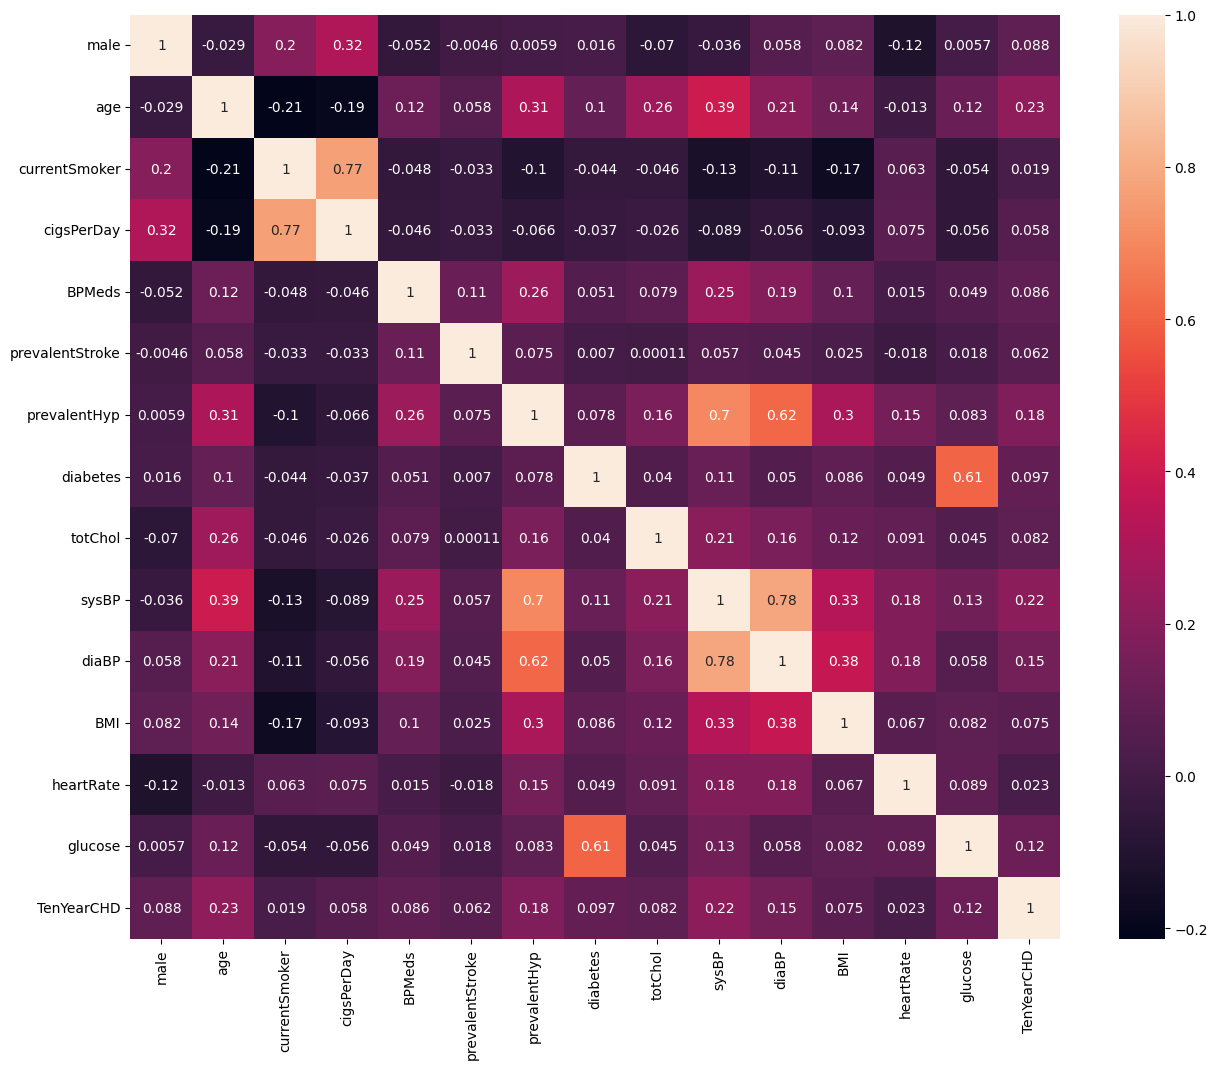

In [ ]:
fig, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(data.corr(), annot = True)

**Drop Correlated Features to Avoid Redundancy in Features**

In [ ]:
data = data.drop(columns = ['cigsPerDay', 'diaBP'], axis=1)
data.head()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,1,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,1,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0


**Seperate Target and Features**

In [ ]:
X = data.drop(columns = ['TenYearCHD'])
y = data['TenYearCHD']

X.shape, y.shape

((4240, 12), (4240,))

**Normalize Features**

In [ ]:
cat_var = data[['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]
num_var = data[['age', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']]

num_var.head()

,age,totChol,sysBP,BMI,heartRate,glucose
0,39,195.0,106.0,26.97,80.0,77.0
1,46,250.0,121.0,28.73,95.0,76.0
2,48,245.0,127.5,25.34,75.0,70.0
3,61,225.0,150.0,28.58,65.0,103.0
4,46,285.0,130.0,23.10,85.0,85.0


**Apply Scaling**

In [ ]:
# Normalize num_var
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = pd.DataFrame(scaler.fit_transform(num_var), columns = num_var.columns)
num_var.head()

,age,totChol,sysBP,BMI,heartRate,glucose
0,0.184211,0.149406,0.106383,0.277024,0.363636,0.104520
1,0.368421,0.242784,0.177305,0.319680,0.515152,0.101695
2,0.421053,0.234295,0.208038,0.237518,0.313131,0.084746
3,0.763158,0.200340,0.314421,0.316045,0.212121,0.177966
4,0.368421,0.302207,0.219858,0.183228,0.414141,0.127119


**Combine Cat and Num Variables**

In [ ]:
frames = [cat_var, num_var]

data_norm = pd.concat(frames, axis=1)
data_norm.head()

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,totChol,sysBP,BMI,heartRate,glucose
0,1,0,0.0,0,0,0,0.184211,0.149406,0.106383,0.277024,0.363636,0.104520
1,0,0,0.0,0,0,0,0.368421,0.242784,0.177305,0.319680,0.515152,0.101695
2,1,1,0.0,0,0,0,0.421053,0.234295,0.208038,0.237518,0.313131,0.084746
3,0,1,0.0,0,1,0,0.763158,0.200340,0.314421,0.316045,0.212121,0.177966
4,0,1,0.0,0,0,0,0.368421,0.302207,0.219858,0.183228,0.414141,0.127119


**Seperate Training & Testing Dataset**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm, y, test_size = 0.25, shuffle = True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3180, 12), (1060, 12), (3180,), (1060,))

### **Model Building**

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy Score:  0.7377358490566037
Confusion Matrix:  [[745 148]
 [130  37]]
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.83      0.84       893
           1       0.20      0.22      0.21       167

    accuracy                           0.74      1060
   macro avg       0.53      0.53      0.53      1060
weighted avg       0.75      0.74      0.74      1060



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy Score:  0.8433962264150944
Confusion Matrix:  [[887   6]
 [160   7]]
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.99      0.91       893
           1       0.54      0.04      0.08       167

    accuracy                           0.84      1060
   macro avg       0.69      0.52      0.50      1060
weighted avg       0.80      0.84      0.78      1060



**SVC - Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy Score:  0.840566037735849
Confusion Matrix:  [[888   5]
 [164   3]]
Classification Report:                precision    recall  f1-score   support

           0       0.84      0.99      0.91       893
           1       0.38      0.02      0.03       167

    accuracy                           0.84      1060
   macro avg       0.61      0.51      0.47      1060
weighted avg       0.77      0.84      0.77      1060

